# Checkpoint 2
## Alunos: Gabriel Gomes e Wandra Martins
## Setor escolhido: Saúde (Dados do SISAGUA)
### Bases escolhidas:
- **municipios_mg.csv** (Base de dados dos municípios no estado de Minas Gerais, mantido por um usuário do GitHub)
- **trat_mg.csv** (Dados sobre o tratamento de água empregado nos sistemas e soluções alternativas de abastecimento de água para consumo humano, informados pelo prestador de serviço em frequência anual no estado de Minas Gerais)

### Importação de bibliotecas e mudanças nas configurações

In [1]:
import pandas as pd
import numpy as np
#import dask.dataframe as dd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import classification_report, accuracy_score


### Carregamento das bases de dados

In [2]:
# Municípios de Minas Gerais
municipios = pd.read_csv('municipios_mg.csv', encoding='utf-8', dtype={'COD_IBGE': str})
municipios.head()

,COD_IBGE,NOME,LATITUDE,LONGITUDE
0,3100104,Abadia dos Dourados,-18.4831,-47.3916
1,3100203,Abaeté,-19.1551,-45.4444
2,3100302,Abre Campo,-20.2996,-42.4743
3,3100401,Acaiaca,-20.3590,-43.1439
4,3100500,Açucena,-19.0671,-42.5419


In [3]:
# Informações gerais
municipios.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COD_IBGE   853 non-null    object 
 1   NOME       853 non-null    object 
 2   LATITUDE   853 non-null    float64
 3   LONGITUDE  853 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.8+ KB


In [4]:
municipios.describe()

,LATITUDE,LONGITUDE
count,853.000000,853.000000
mean,-19.584236,-44.102022
std,1.924908,1.948347
min,-22.854000,-50.689400
25%,-21.093200,-45.459800
50%,-19.882600,-43.934300
75%,-18.483100,-42.616700
max,-14.266200,-39.939100


In [5]:
# Dados do tratamento de água de empresas mineiras
tratamento = pd.read_csv('trat_mg.csv', encoding='utf-8', dtype={'COD_IBGE': str, 'ANO': str, 'CARROPIPA': str, 'CHAFARIZ': str, 'FONTE': str, 'CISTERNA': str, 'CANALIZACAO': str})

# Removendo valores null/NaN restantes
tratamento['CANALIZACAO'] = tratamento.CANALIZACAO.fillna('N')
tratamento['CARROPIPA'] = tratamento.CARROPIPA.fillna('N')
tratamento['FONTE'] = tratamento.FONTE.fillna('N')
tratamento['CHAFARIZ'] = tratamento.CHAFARIZ.fillna('N')
tratamento['CISTERNA'] = tratamento.CISTERNA.fillna('N')
tratamento['VAZAO_AGUA'] = tratamento.VAZAO_AGUA.fillna(0.0)
tratamento['NUM_FILTROS'] = tratamento.NUM_FILTROS.fillna(0.0)
tratamento['OUTRA_ETP'] = tratamento.OUTRA_ETP.fillna('N')
tratamento['OUTRO_DESINF'] = tratamento.OUTRO_DESINF.fillna('N')
tratamento['OUTRO_SUPRIMENTO'] = tratamento.OUTRO_SUPRIMENTO.fillna('N')

tratamento.head()

,COD_IBGE,TIPO_INST,SIGLA_INST,NOME_INST,FORMA_ABASTEC,NOME_F_ABASTEC,NOME_ETA,ANO,CAPT_SUPERFICIAL,CAPT_SUBTERRANEA,CAPT_AGUA_CHUVA,TEMPO_MEDIO_FUNC,ETP_PRE_OXIDACAO,ETP_MIST_RAP_C0AG,ETP_FLOCULACAO,ETP_DECANTACAO,ETP_FLOTACAO,TIPO_FILTRACAO,NUM_FILTROS,IMP_MONIT,ETP_DESINFECCAO,DESINF_CLORO_GAS_HIPOC,DESINF_ISOCIANURATOS,DESINF_CLORAMINA,DESINF_DIOXIDO_CLORO,DESINF_OZONIO,DESINF_UV,OUTRO_DESINF,RAD_CLORO_RES_LIVRE,RAD_DIOX_CLORO,RAD_CLORO_RES_COMB,POLIM_COM_EPICOLIDRINA,POLIM_COM_ACRILAMIDA,ETP_FLUORETACAO,ETP_DESFLUORETACAO,OUTRA_ETP,VAZAO_AGUA,CARROPIPA,CHAFARIZ,FONTE,CISTERNA,CANALIZACAO,OUTRO_SUPRIMENTO
0,313005,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SAA ICARAI DE MINAS ...,ICARAI DE MINAS ...,2014,N,S,N,10:00,N,N,N,N,N,SEM FILTRAÇÃO ...,0.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,14.00,N,N,N,N,N,N
1,316460,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA SAO SEBASTIAO DO OESTE ...,ETA SAO SEBASTIÃO DO OESTE ...,2014,N,S,N,17:00,N,N,N,N,N,SEM FILTRAÇÃO ...,0.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,12.28,N,N,N,N,N,N
2,313830,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA LEANDRO FERREIRA ...,ETA LEANDRO FERREIRA ...,2014,N,S,N,11:00,N,N,N,N,N,SEM FILTRAÇÃO ...,0.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,11.50,N,N,N,N,N,N
3,314970,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA PERDIGAO ...,ETA PERDIGAO ...,2014,S,N,N,21:55,N,S,S,S,N,FILTRAÇÃO RÁPIDA ...,4.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,N,N,N,23.00,N,N,N,N,N,N
4,313290,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA DE ABASTECIMENTO DE AGUA DE ITAMOGI ...,COPASA MG ...,2014,S,N,N,16:08,N,S,S,S,N,FILTRAÇÃO LENTA ...,5.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,0.01,N,N,N,N,N,N


In [6]:
# Informações gerais
tratamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54039 entries, 0 to 54038
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COD_IBGE                54039 non-null  object 
 1   TIPO_INST               54039 non-null  object 
 2   SIGLA_INST              54039 non-null  object 
 3   NOME_INST               54039 non-null  object 
 4   FORMA_ABASTEC           54039 non-null  object 
 5   NOME_F_ABASTEC          54039 non-null  object 
 6   NOME_ETA                54039 non-null  object 
 7   ANO                     54039 non-null  object 
 8   CAPT_SUPERFICIAL        54039 non-null  object 
 9   CAPT_SUBTERRANEA        54039 non-null  object 
 10  CAPT_AGUA_CHUVA         54039 non-null  object 
 11  TEMPO_MEDIO_FUNC        54039 non-null  object 
 12  ETP_PRE_OXIDACAO        54039 non-null  object 
 13  ETP_MIST_RAP_C0AG       54039 non-null  object 
 14  ETP_FLOCULACAO          54039 non-null

In [7]:
tratamento.describe()

,NUM_FILTROS,VAZAO_AGUA
count,54039.000000,54039.000000
mean,0.971391,27.965571
std,2.209015,623.413527
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,5.010000
max,65.000000,40000.000000


In [8]:
municipios_num = municipios.copy()

# Definir colunas categóricas a serem transformadas
colunas_nao_numericas = ["COD_IBGE", "NOME"]

# Aplicar LabelEncoder para cada coluna categórica na cópia
le = LabelEncoder()

for coluna in colunas_nao_numericas:
    if coluna in municipios_num.columns:
        municipios_num[coluna] = le.fit_transform(municipios_num[coluna].astype(str))  # Convertendo para string antes de transformar

# Salvar o DataFrame transformado sem modificar o original
municipios_num.to_csv("municipios_mg_num.csv", index=False)


In [9]:
municipios_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COD_IBGE   853 non-null    int64  
 1   NOME       853 non-null    int64  
 2   LATITUDE   853 non-null    float64
 3   LONGITUDE  853 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 26.8 KB


In [10]:
tratamento_num = tratamento.copy()
# Transformando as colunas não numéricas em colunas numéricas
colunas_nao_numericas = [
    "TIPO_INST", "SIGLA_INST", "NOME_INST", "FORMA_ABASTEC", "NOME_F_ABASTEC", "NOME_ETA", "ANO", 
    "CAPT_SUPERFICIAL", "CAPT_SUBTERRANEA", "CAPT_AGUA_CHUVA", "TEMPO_MEDIO_FUNC", "ETP_PRE_OXIDACAO", "ETP_MIST_RAP_C0AG", 
    "ETP_FLOCULACAO", "ETP_DECANTACAO", "ETP_FLOTACAO", "TIPO_FILTRACAO", "IMP_MONIT", "ETP_DESINFECCAO", 
    "DESINF_CLORO_GAS_HIPOC", "DESINF_ISOCIANURATOS", "DESINF_CLORAMINA", "DESINF_DIOXIDO_CLORO", "DESINF_OZONIO", 
    "DESINF_UV", "OUTRO_DESINF", "RAD_CLORO_RES_LIVRE", "RAD_DIOX_CLORO", "RAD_CLORO_RES_COMB", "POLIM_COM_EPICOLIDRINA", 
    "POLIM_COM_ACRILAMIDA", "ETP_FLUORETACAO", "ETP_DESFLUORETACAO", "OUTRA_ETP", "CARROPIPA", "CHAFARIZ", "FONTE", 
    "CISTERNA", "CANALIZACAO", "OUTRO_SUPRIMENTO"
]

# Aplicando LabelEncoder para cada coluna categórica
le = LabelEncoder()

for coluna in colunas_nao_numericas:
    if coluna in tratamento_num.columns:
        tratamento_num[coluna] = le.fit_transform(tratamento_num[coluna].astype(str))  # Convertendo para string antes de transformar

# Salvando o DataFrame transformado
tratamento_num.to_csv("trat_num.csv", index=False)

In [11]:
tratamento_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54039 entries, 0 to 54038
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COD_IBGE                54039 non-null  object 
 1   TIPO_INST               54039 non-null  int64  
 2   SIGLA_INST              54039 non-null  int64  
 3   NOME_INST               54039 non-null  int64  
 4   FORMA_ABASTEC           54039 non-null  int64  
 5   NOME_F_ABASTEC          54039 non-null  int64  
 6   NOME_ETA                54039 non-null  int64  
 7   ANO                     54039 non-null  int64  
 8   CAPT_SUPERFICIAL        54039 non-null  int64  
 9   CAPT_SUBTERRANEA        54039 non-null  int64  
 10  CAPT_AGUA_CHUVA         54039 non-null  int64  
 11  TEMPO_MEDIO_FUNC        54039 non-null  int64  
 12  ETP_PRE_OXIDACAO        54039 non-null  int64  
 13  ETP_MIST_RAP_C0AG       54039 non-null  int64  
 14  ETP_FLOCULACAO          54039 non-null

In [12]:
# Matriz de correlações
corr = municipios_num.corr()
corr

,COD_IBGE,NOME,LATITUDE,LONGITUDE
COD_IBGE,1.000000,0.963447,0.027914,0.068912
NOME,0.963447,1.000000,0.049215,0.071401
LATITUDE,0.027914,0.049215,1.000000,0.271002
LONGITUDE,0.068912,0.071401,0.271002,1.000000


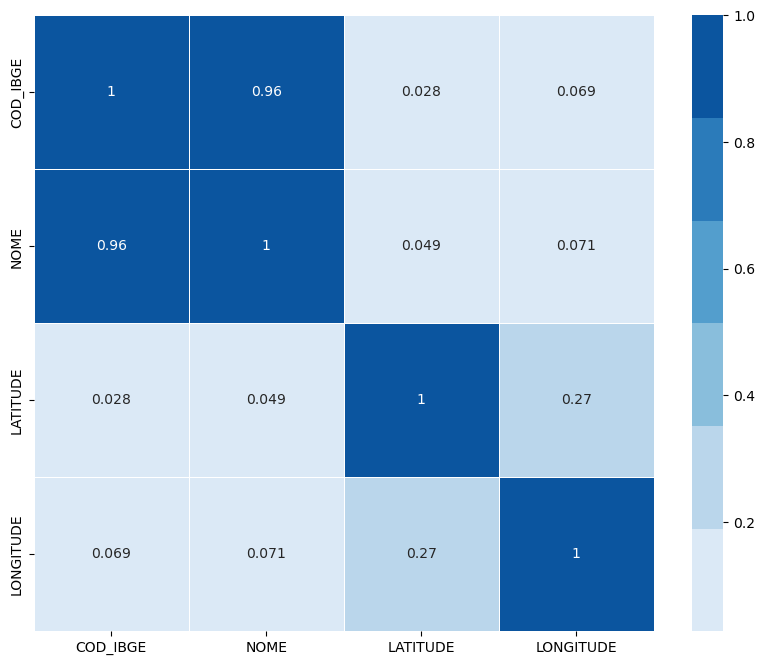

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [14]:
# Matriz de correlações
corr = tratamento_num.corr()
corr

,COD_IBGE,TIPO_INST,SIGLA_INST,NOME_INST,FORMA_ABASTEC,NOME_F_ABASTEC,NOME_ETA,ANO,CAPT_SUPERFICIAL,CAPT_SUBTERRANEA,CAPT_AGUA_CHUVA,TEMPO_MEDIO_FUNC,ETP_PRE_OXIDACAO,ETP_MIST_RAP_C0AG,ETP_FLOCULACAO,ETP_DECANTACAO,ETP_FLOTACAO,TIPO_FILTRACAO,NUM_FILTROS,IMP_MONIT,ETP_DESINFECCAO,DESINF_CLORO_GAS_HIPOC,DESINF_ISOCIANURATOS,DESINF_CLORAMINA,DESINF_DIOXIDO_CLORO,DESINF_OZONIO,DESINF_UV,OUTRO_DESINF,RAD_CLORO_RES_LIVRE,RAD_DIOX_CLORO,RAD_CLORO_RES_COMB,POLIM_COM_EPICOLIDRINA,POLIM_COM_ACRILAMIDA,ETP_FLUORETACAO,ETP_DESFLUORETACAO,OUTRA_ETP,VAZAO_AGUA,CARROPIPA,CHAFARIZ,FONTE,CISTERNA,CANALIZACAO,OUTRO_SUPRIMENTO
COD_IBGE,1.000000,0.033091,-0.011101,0.070485,-0.008025,0.020234,0.023535,0.002175,0.002054,-0.000894,-0.001962,-0.030827,0.012571,0.004773,0.001403,0.002293,-0.003803,0.009598,0.002167,0.011185,0.044537,0.036287,0.026512,-0.011221,-0.051039,-0.011061,-0.007444,NaN,0.057015,-0.049292,-0.016904,-0.001470,-0.000105,-0.020165,-0.003600,NaN,0.014889,NaN,NaN,NaN,NaN,NaN,NaN
TIPO_INST,0.033091,1.000000,0.806226,0.177405,-0.658186,0.166143,0.457941,-0.034558,0.309468,-0.263475,-0.116425,-0.074172,0.394246,0.465265,0.454437,0.456057,0.210392,-0.396269,0.421841,0.019527,0.597081,0.583102,-0.000567,0.058604,0.037018,-0.000259,0.004867,NaN,0.585067,0.037200,0.046950,0.002293,-0.002313,0.651784,0.009556,NaN,0.028075,NaN,NaN,NaN,NaN,NaN,NaN
SIGLA_INST,-0.011101,0.806226,1.000000,-0.333569,-0.566616,0.139041,0.351659,-0.045682,0.276919,-0.236938,-0.070471,-0.087119,0.457106,0.478458,0.467292,0.463551,0.213683,-0.385697,0.450842,0.023153,0.508609,0.515887,-0.011350,0.074110,0.009076,-0.007370,0.004011,NaN,0.502674,0.008491,0.066474,-0.006715,-0.007370,0.733974,0.007503,NaN,0.023798,NaN,NaN,NaN,NaN,NaN,NaN
NOME_INST,0.070485,0.177405,-0.333569,1.000000,-0.116617,0.120644,0.178634,-0.002498,0.051963,-0.043481,-0.056805,0.052720,-0.139022,-0.048335,-0.046995,-0.038215,-0.040511,0.007154,-0.071097,0.004062,0.060348,0.025811,0.026091,-0.025726,0.027889,0.019460,-0.015831,NaN,0.055171,0.028754,-0.030672,0.020897,0.004696,-0.143497,-0.002690,NaN,0.013070,NaN,NaN,NaN,NaN,NaN,NaN
FORMA_ABASTEC,-0.008025,-0.658186,-0.566616,-0.116617,1.000000,-0.244365,-0.792309,0.056085,-0.356831,0.290342,0.115005,-0.010535,-0.338031,-0.509219,-0.498678,-0.508389,-0.207691,0.441490,-0.414912,-0.033458,-0.626910,-0.597551,-0.028108,-0.033762,-0.051828,-0.014671,-0.020546,NaN,-0.613674,-0.052215,-0.026326,-0.020519,-0.008888,-0.636738,-0.011343,NaN,-0.043650,NaN,NaN,NaN,NaN,NaN,NaN
NOME_F_ABASTEC,0.020234,0.166143,0.139041,0.120644,-0.244365,1.000000,0.347085,-0.019173,0.077756,-0.060584,-0.024393,-0.015987,0.096602,0.111672,0.110384,0.105284,0.040327,-0.055458,0.077920,0.013545,0.140299,0.137327,0.030737,0.000415,-0.006396,0.007015,-0.021293,NaN,0.142267,-0.005757,-0.002532,0.015162,0.005079,0.144156,-0.016448,NaN,0.008635,NaN,NaN,NaN,NaN,NaN,NaN
NOME_ETA,0.023535,0.457941,0.351659,0.178634,-0.792309,0.347085,1.000000,-0.043377,0.196331,-0.152161,-0.091120,-0.005725,0.187169,0.263223,0.263191,0.265818,0.113254,-0.229025,0.221289,0.018034,0.429982,0.399373,0.051989,0.031882,0.045492,0.001242,0.007833,NaN,0.416401,0.047342,0.025317,0.020480,0.009865,0.414477,0.008059,NaN,0.026917,NaN,NaN,NaN,NaN,NaN,NaN
ANO,0.002175,-0.034558,-0.045682,-0.002498,0.056085,-0.019173,-0.043377,1.000000,-0.060056,0.065866,0.026853,0.051051,-0.027168,-0.059681,-0.087579,-0.056436,-0.034218,0.043402,-0.038773,0.065539,-0.033288,-0.051140,0.036301,-0.018425,-0.012229,-0.007446,-0.004338,NaN,-0.024764,-0.011931,-0.013305,0.025054,0.016077,-0.054166,0.021180,NaN,-0.009399,NaN,NaN,NaN,NaN,NaN,NaN
CAPT_SUPERFICIAL,0.002054,0.309468,0.276919,0.051963,-0.356831,0.077756,0.196331,-0.060056,1.000000,-0.883833,-0.040924,0.211653,0.353147,0.625999,0.623943,0.628392,0.271348,-0.529464,0.508643,0.026322,0.223884,0.237208,-0.009750,0.038847,0.015878,0.017552,0.021061,NaN,0.225345,0.017240,0.033058,0.007141,0.008538,0.363879,0.002618,NaN,0.043834,NaN,NaN,NaN,NaN,NaN,NaN
CAPT_SUBTERRANEA,-0.000894,-0.26

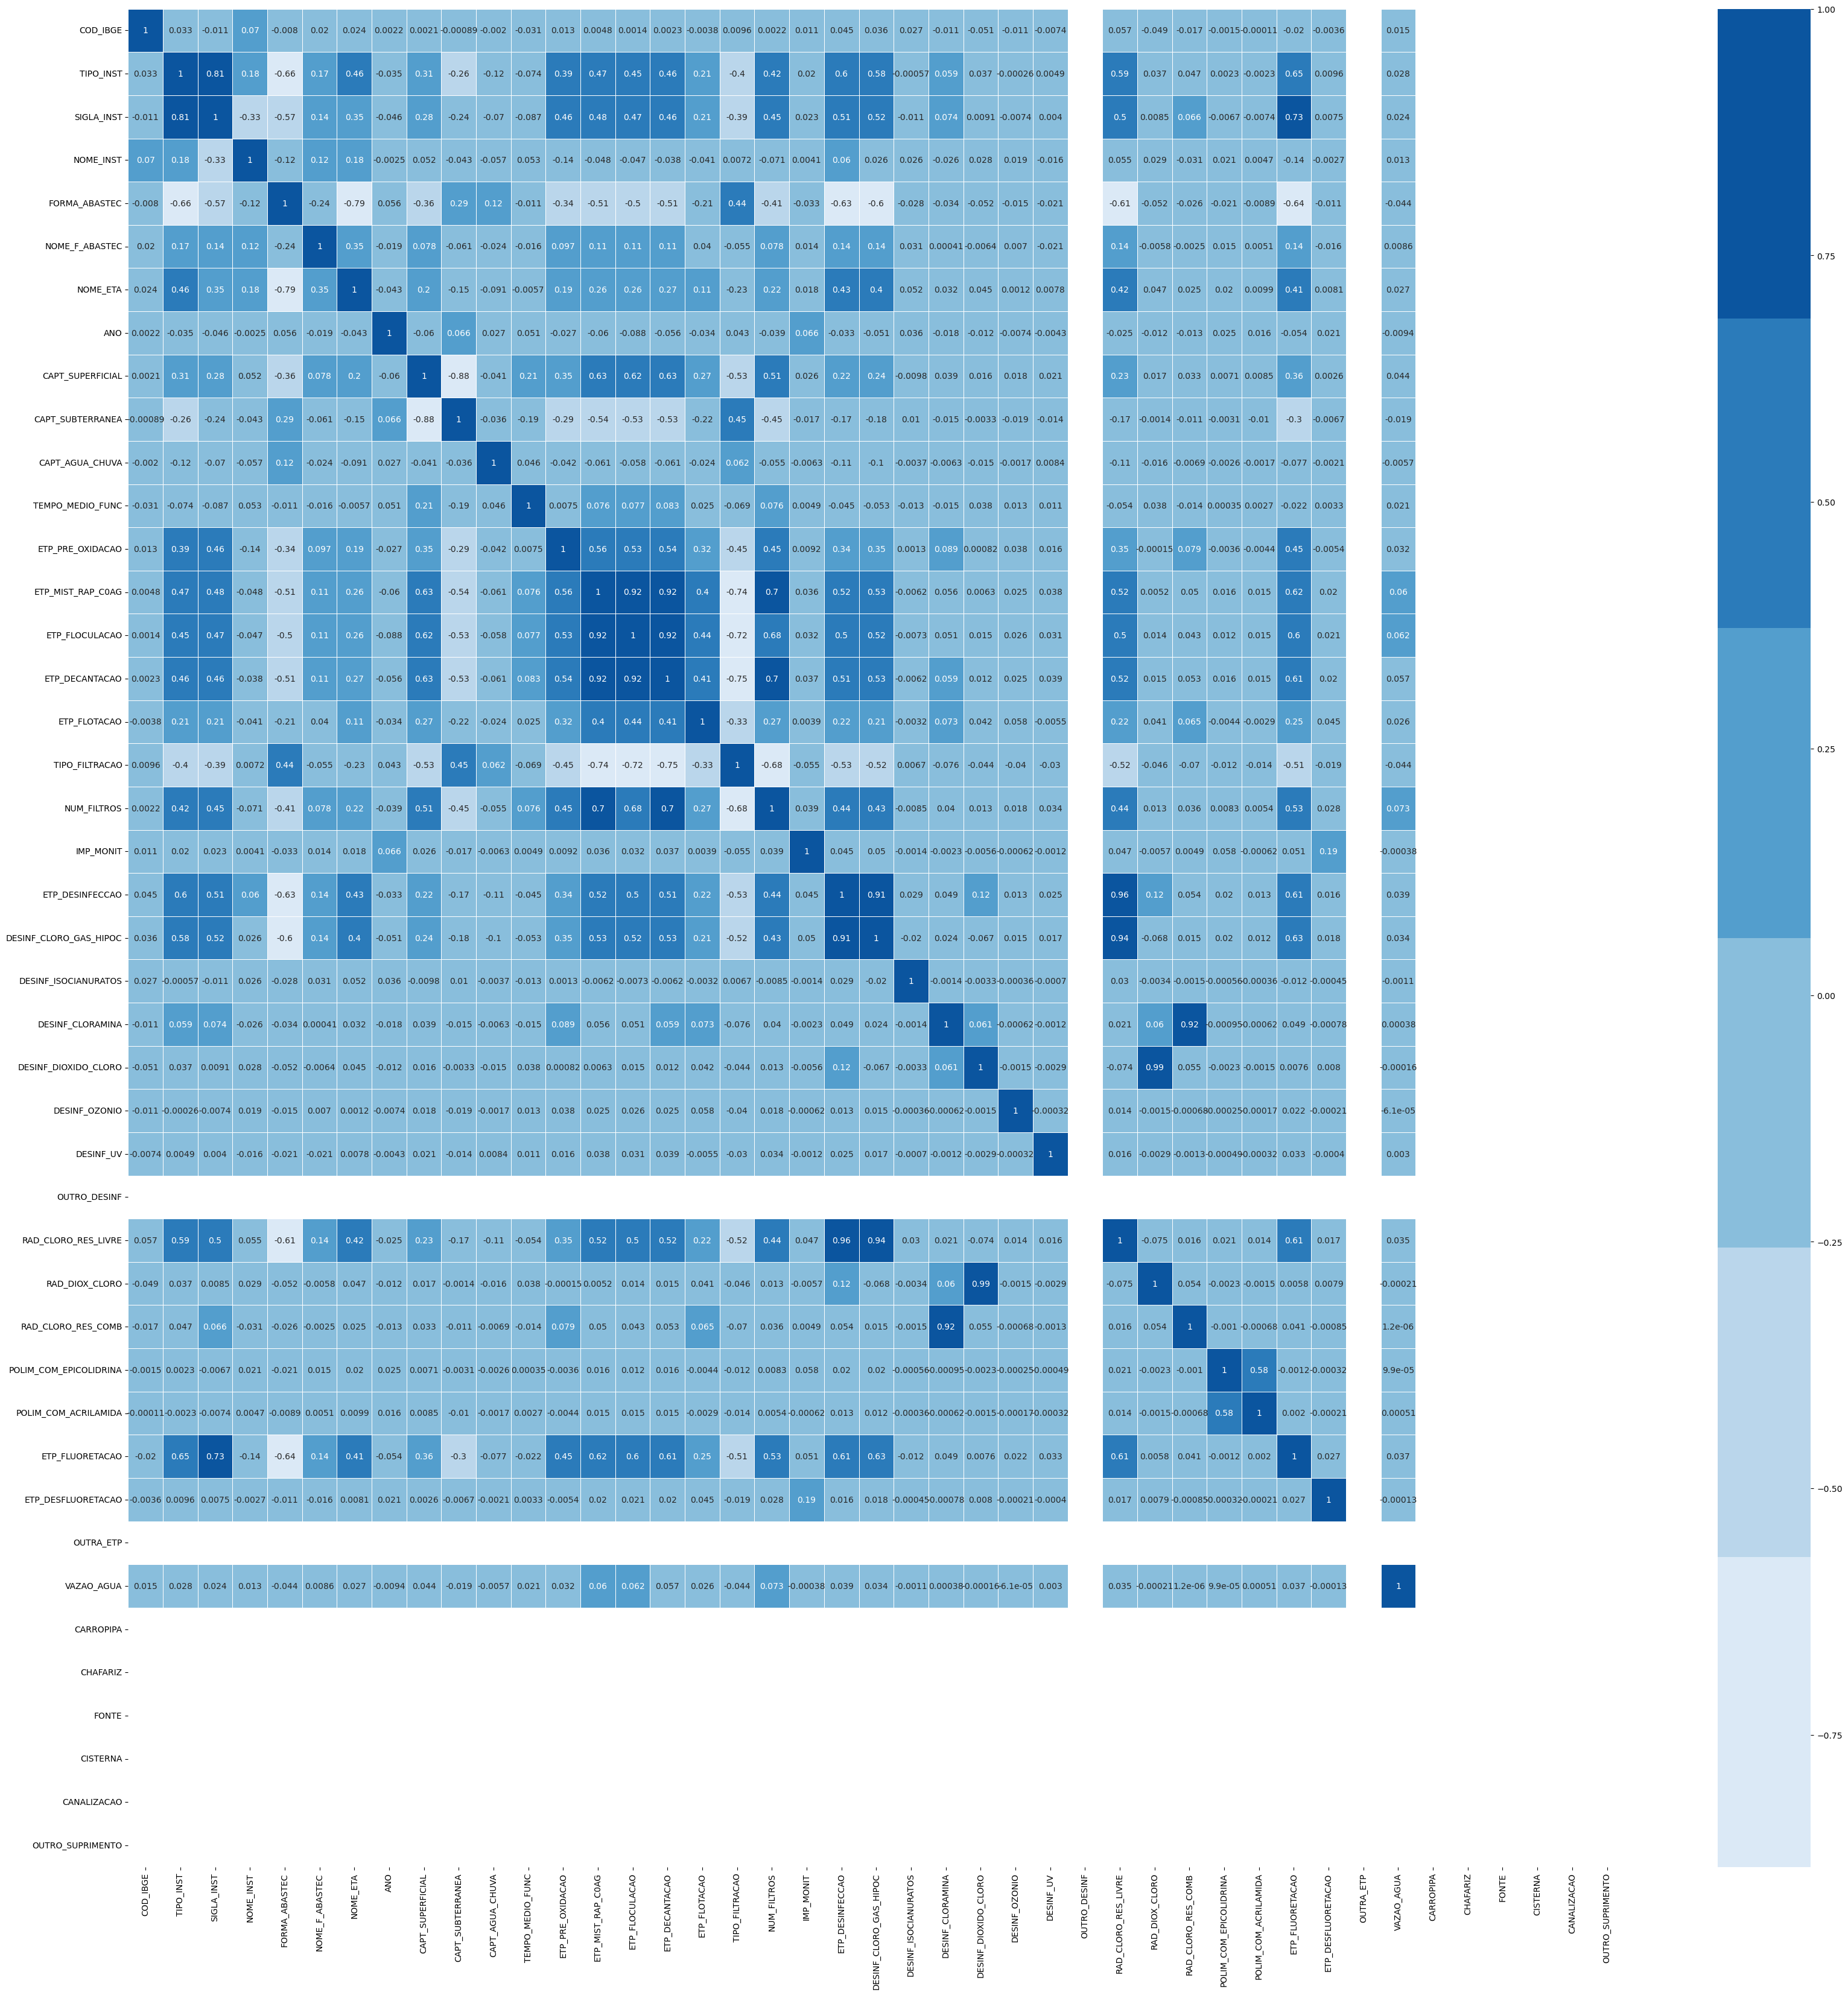

In [15]:
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);


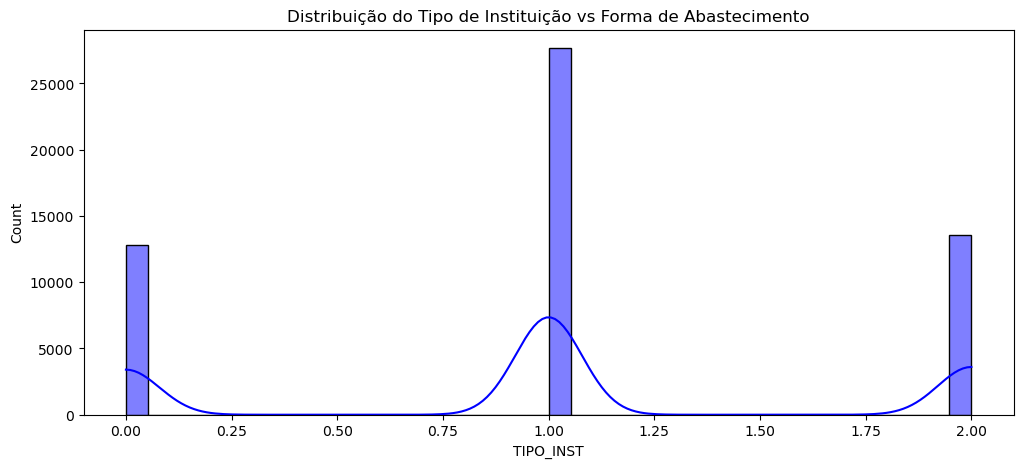

In [16]:
# Relação: TIPO_INST x FORMA_ABASTEC
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição do Tipo de Instituição vs Forma de Abastecimento")
sns.histplot(tratamento_num['TIPO_INST'], kde=True, color='b')
plt.show()

In [17]:
contagem = tratamento['FORMA_ABASTEC'].value_counts()
print(contagem)

FORMA_ABASTEC
SAC           30463
SAA           23576
Name: count, dtype: int64


In [18]:
contagem = tratamento['TIPO_INST'].value_counts()
print(contagem)

TIPO_INST
Local       27673
Regional    13562
            12804
Name: count, dtype: int64


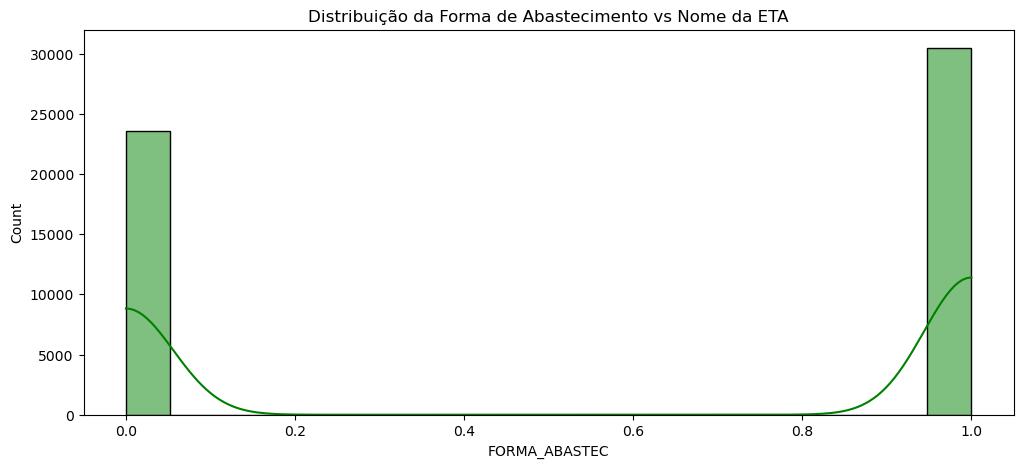

In [19]:
# Relação: FORMA_ABASTEC x NOME_ETA
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Forma de Abastecimento vs Nome da ETA")
sns.histplot(tratamento_num['FORMA_ABASTEC'], kde=True, color='g')
plt.show()

In [20]:
contagem = tratamento['NOME_ETA'].value_counts()
print(contagem)

NOME_ETA
                                                                                                        30463
COPASA                                                                                                    171
ETA                                                                                                       126
ETA CONVENCIONAL                                                                                          125
CURRALINHO                                                                                                 91
                                                                                                        ...  
ALTO MARANHÃO                                                                                               1
PEQUERI                                                                                                     1
ETA CONCIONAL/ POÇOS ARTESIANOS                                                                             1
E

In [21]:
contagem = tratamento['FORMA_ABASTEC'].value_counts()
print(contagem)

FORMA_ABASTEC
SAC           30463
SAA           23576
Name: count, dtype: int64


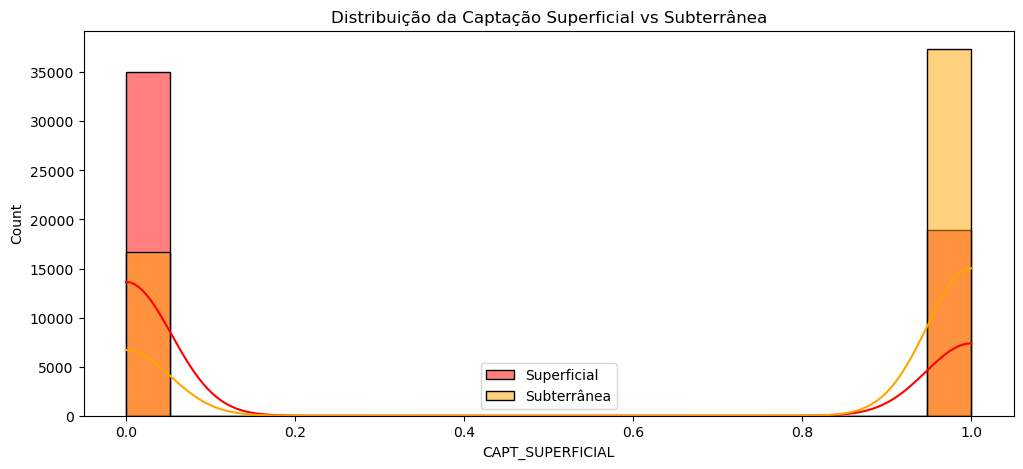

In [22]:
# Relação: CAPT_SUPERFICIAL x CAPT_SUBTERRANEA
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Captação Superficial vs Subterrânea")
sns.histplot(tratamento_num['CAPT_SUPERFICIAL'], kde=True, color='r', label="Superficial")
sns.histplot(tratamento_num['CAPT_SUBTERRANEA'], kde=True, color='orange', label="Subterrânea")
plt.legend()
plt.show()

In [23]:
contagem = tratamento['CAPT_SUPERFICIAL'].value_counts()
print(contagem)

CAPT_SUPERFICIAL
N    35074
S    18965
Name: count, dtype: int64


In [24]:
contagem = tratamento['CAPT_SUBTERRANEA'].value_counts()
print(contagem)

CAPT_SUBTERRANEA
S    37372
N    16667
Name: count, dtype: int64


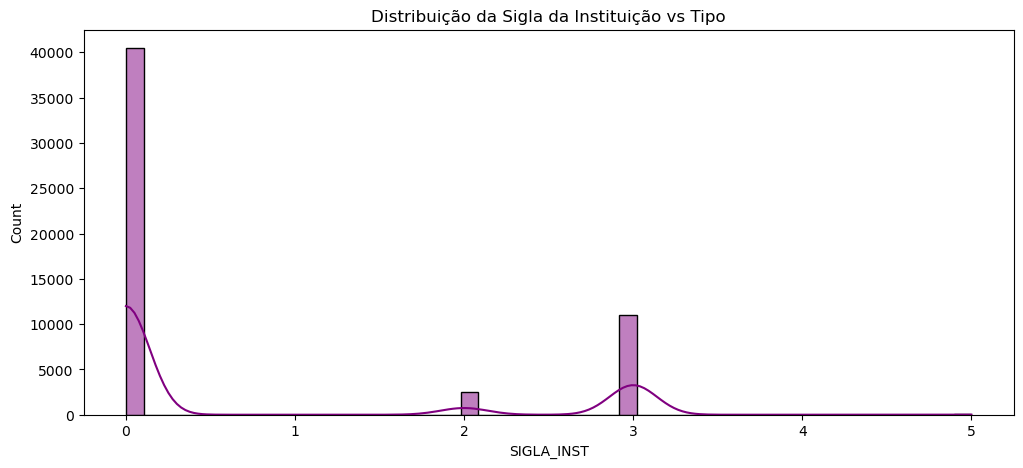

In [25]:
# Relação: SIGLA_INST x TIPO_INST
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Sigla da Instituição vs Tipo")
sns.histplot(tratamento_num['SIGLA_INST'], kde=True, color='purple')
plt.show()

In [26]:
contagem = tratamento['SIGLA_INST'].value_counts()
print(contagem)

SIGLA_INST
              40477
COPASA        11017
COPANOR        2490
SESAI            29
SA               18
AP FERNAO         8
Name: count, dtype: int64


In [27]:
contagem = tratamento['TIPO_INST'].value_counts()
print(contagem)

TIPO_INST
Local       27673
Regional    13562
            12804
Name: count, dtype: int64


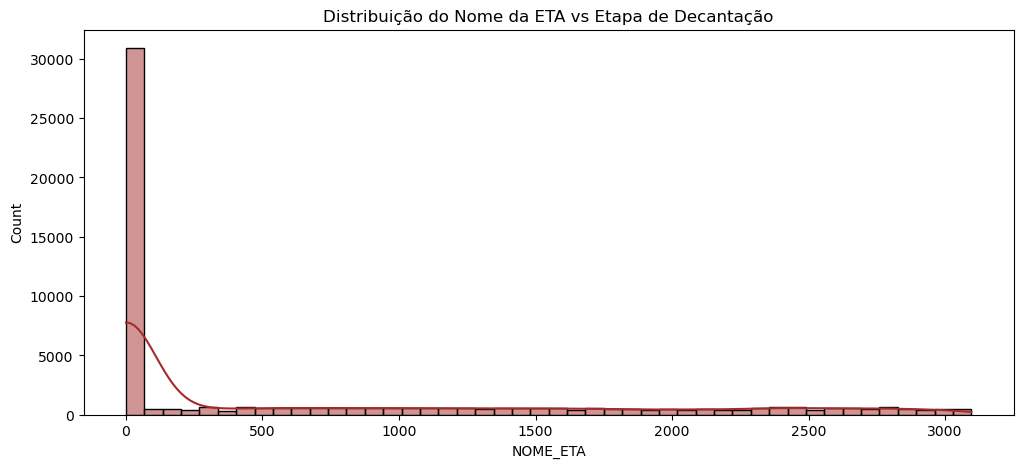

In [28]:
# Relação: NOME_ETA x ETP_DECANTACAO
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição do Nome da ETA vs Etapa de Decantação")
sns.histplot(tratamento_num['NOME_ETA'], kde=True, color='brown')
plt.show()


In [29]:
contagem = tratamento['NOME_ETA'].value_counts()
print(contagem)

NOME_ETA
                                                                                                        30463
COPASA                                                                                                    171
ETA                                                                                                       126
ETA CONVENCIONAL                                                                                          125
CURRALINHO                                                                                                 91
                                                                                                        ...  
ALTO MARANHÃO                                                                                               1
PEQUERI                                                                                                     1
ETA CONCIONAL/ POÇOS ARTESIANOS                                                                             1
E

In [30]:
contagem = tratamento['ETP_DECANTACAO'].value_counts()
print(contagem)

ETP_DECANTACAO
N    42955
S    11084
Name: count, dtype: int64


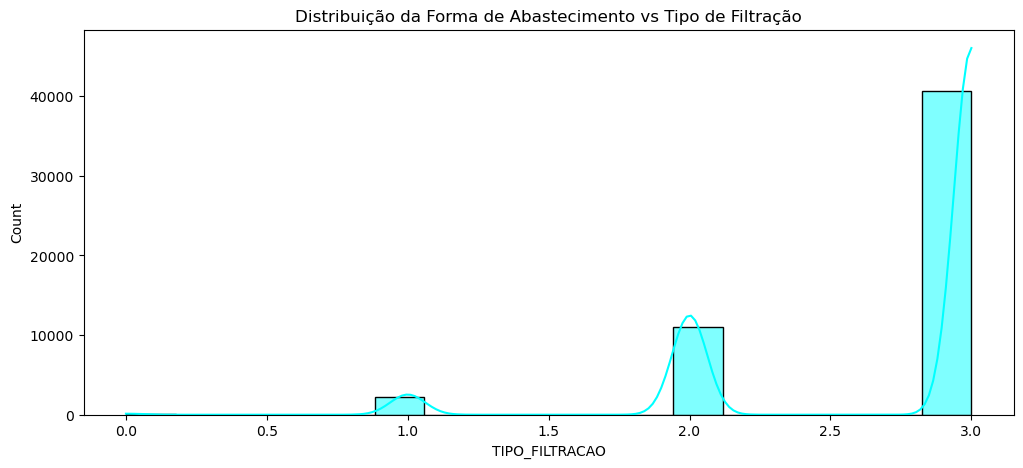

In [31]:
# Relação: FORMA_ABASTEC x TIPO_FILTRACAO
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Forma de Abastecimento vs Tipo de Filtração")
sns.histplot(tratamento_num['TIPO_FILTRACAO'], kde=True, color='cyan')
plt.show()

In [32]:
contagem = tratamento['TIPO_FILTRACAO'].value_counts()
print(contagem)

TIPO_FILTRACAO
SEM FILTRAÇÃO                                         40668
FILTRAÇÃO RÁPIDA                                      11021
FILTRAÇÃO LENTA                                        2238
FILTRAÇÃO EM MEMBRANAS                                  112
Name: count, dtype: int64


In [33]:
contagem = tratamento['FORMA_ABASTEC'].value_counts()
print(contagem)

FORMA_ABASTEC
SAC           30463
SAA           23576
Name: count, dtype: int64


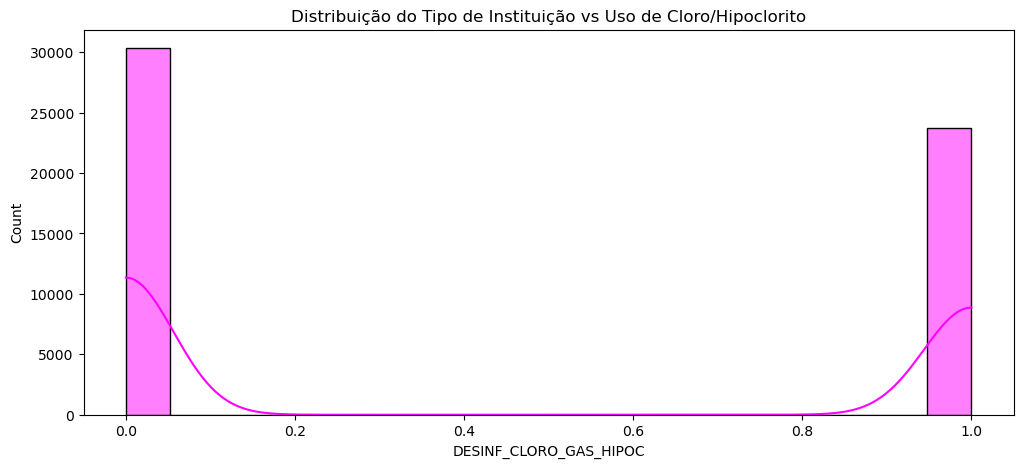

In [34]:
# Relação: TIPO_INST x DESINF_CLORO_GAS_HIPOC
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição do Tipo de Instituição vs Uso de Cloro/Hipoclorito")
sns.histplot(tratamento_num['DESINF_CLORO_GAS_HIPOC'], kde=True, color='magenta')
plt.show()

In [35]:
contagem = tratamento['TIPO_INST'].value_counts()
print(contagem)

TIPO_INST
Local       27673
Regional    13562
            12804
Name: count, dtype: int64


In [36]:
contagem = tratamento['DESINF_CLORO_GAS_HIPOC'].value_counts()
print(contagem)

DESINF_CLORO_GAS_HIPOC
N    30337
S    23702
Name: count, dtype: int64


In [37]:
X = tratamento_num[['CAPT_SUPERFICIAL', 'CAPT_SUBTERRANEA']]  # Variáveis independentes
y = tratamento_num['VAZAO_AGUA']  # Variável dependente

# Inicializando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X, y)

# Coeficientes
print("Coeficientes:", model.coef_)

# Intercepto
print("Intercepto:", model.intercept_)

# Previsões
y_pred = model.predict(X)

# Mostre as previsões ou use para outros cálculos
print("Previsões:", y_pred)


Coeficientes: [160.65903962 120.90101024]
Intercepto: -112.02982551521922
Previsões: [8.87118472 8.87118472 8.87118472 ... 8.87118472 8.87118472 8.87118472]


In [38]:
# Avaliação do modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("R²:", r2)


Erro Quadrático Médio (MSE): 387208.20220809826
R²: 0.0036770311347535944



Com base nos resultados da regressão linear, podemos fazer as seguintes conclusões:

#### Coeficientes e Intercepto
- Coeficientes:
CAPT_SUPERFICIAL: 160.66
CAPT_SUBTERRANEA: 120.90
- Intercepto: -112.03
Estes valores indicam que para cada aumento unitário em "CAPT_SUPERFICIAL", a variável dependente "VAZAO_AGUA" aumenta em 160.66, e para cada aumento unitário em "CAPT_SUBTERRANEA", a "VAZAO_AGUA" aumenta em 120.90. O valor negativo do intercepto sugere que, caso ambos os valores das variáveis independentes sejam zero, a "VAZAO_AGUA" seria de aproximadamente -112.03, o que não é intuitivo para um modelo de vazão de água, indicando que talvez o modelo não seja ideal para esses dados.

#### Previsões
As previsões de vazão de água fornecidas pelo modelo são todas iguais, com um valor de aproximadamente 8.87. Isso pode indicar que o modelo está com dificuldades em capturar a variação dos dados. Essa falta de variabilidade nas previsões sugere que o modelo pode estar sofrendo de underfitting.

#### Erro Quadrático Médio (MSE)
O Erro Quadrático Médio (MSE) de 387208.20 é relativamente alto, o que indica que o modelo está cometendo erros consideráveis em suas previsões. Quanto menor o valor de MSE, melhor o modelo, então um valor elevado sugere que o modelo não está se ajustando bem aos dados.

#### R²
O R² (coeficiente de determinação) de 0.0037 indica que o modelo explica apenas 0.37% da variação nos dados de "VAZAO_AGUA". Isso é extremamente baixo, sugerindo que a relação entre as variáveis independentes e a variável dependente é fraca ou até inexistente

In [ ]:


# Carregar os dados
df = pd.read_csv("trat_num.csv")

# Remover colunas de identificação e variáveis numéricas indesejadas
cols_to_drop = ["COD_IBGE", "TIPO_INST", "SIGLA_INST", "NOME_INST", "FORMA_ABASTEC", 
                "NOME_F_ABASTEC", "NOME_ETA", "ANO"]
df = df.drop(columns=cols_to_drop)

# Definir variáveis independentes (X) e dependente (y)
X = df.drop(columns=["TIPO_FILTRACAO"])
y = df["TIPO_FILTRACAO"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

Acurácia: 0.99
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.92      0.95      0.94       433
           2       0.99      0.98      0.99      2232
           3       1.00      1.00      1.00      8122

    accuracy                           0.99     10808
   macro avg       0.90      0.92      0.91     10808
weighted avg       0.99      0.99      0.99     10808



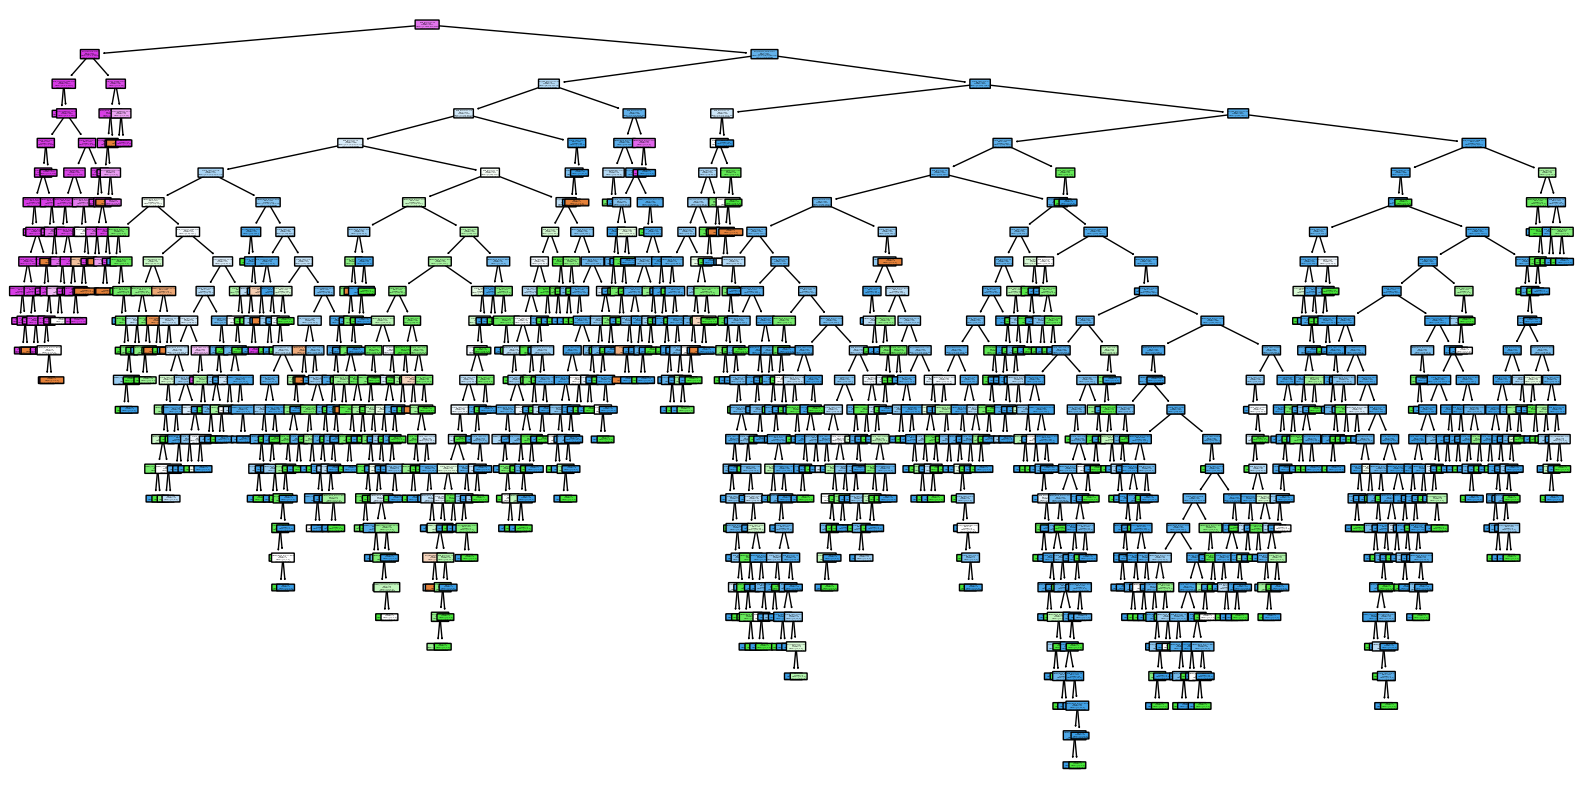

In [71]:
# Mostrar a árvore de decisão
class_names = ["Filtração em Membranas", "Filtração Lenta", "Filtração Rápida", "Sem Filtração"]

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()

In [64]:
contagem = y_train.value_counts()
print(contagem)


TIPO_FILTRACAO
3    32546
2     8789
1     1805
0       91
Name: count, dtype: int64


In [65]:
contagem = y_test.value_counts()
print(contagem)

TIPO_FILTRACAO
3    8122
2    2232
1     433
0      21
Name: count, dtype: int64


In [66]:
contagem = tratamento['TIPO_FILTRACAO'].value_counts()
print(contagem)

TIPO_FILTRACAO
SEM FILTRAÇÃO                                         40668
FILTRAÇÃO RÁPIDA                                      11021
FILTRAÇÃO LENTA                                        2238
FILTRAÇÃO EM MEMBRANAS                                  112
Name: count, dtype: int64


Antes de dividir os dados eu transformei tudo que era string em número, para melhorar o entendimento da machine learning, não se preocupe, não houve perdas nos dados. As saidas em numero ficaram: 
- 0 = FILTRAÇÃO EM MEMBRANAS, 
- 1 = FILTRAÇÃO LENTA ,
- 2 = FILTRAÇÃO RÁPIDA E 
- 3 = SEM FILTRAÇÃO.

No algoritmo eu dividi 60 % para treinamento e 40% para testes. Após treinada a machine learning, eu enviei os dados de teste e os resultados estão quatros quadrados acima.

Análisando os dados percerbemos que para identificar 0 a machine learning tem uma precisão de 70%, ou seja ela 30% dos dados que ela classifica como sendo 0 não são zeros. 

Tem um recall de 76%, significa que 24% dos dados classificados como não sendo zero , na verdade são zero. Esse erro de precisão e recall se deve a quantidade muito inferior de dados do tipo 0 no sistema como um todo.

Uma solução para melhorar esses classificador seria entregar uma proporção de dados mais justas entre as varíaveis.Uma sugestão poderia ser, deixar os outros dados como 2 vezes a quantidade de dados da classe 0. Para as demais classes a machine learning teve uma alta precisão e recall, significando que ela sabe diferenciar bem os tipos de filtração, exceto a filtração com membranas.

## Análise das Métricas de Desempenho do Modelo

### 1. **Acurácia (Accuracy)**
- **Definição**: A acurácia é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões feitas.
- **Valor**: **0.99**, ou seja, 99% das previsões feitas pelo modelo estão corretas. Esse valor é influenciado por classes desbalanceadas, já que a classe 3 (**Sem Filtração**) possui uma grande quantidade de amostras. Embora seja alta, a acurácia pode ser enganosa em cenários com classes desbalanceadas, como neste caso, onde a classe 0 (**Filtração em Membranas**) tem muito menos exemplos.

### 2. **Precision (Precisão)**
- **Definição**: A precisão é a proporção de previsões positivas corretas em relação ao total de previsões feitas como positivas. Em outras palavras, é a capacidade do modelo de não classificar incorretamente uma amostra negativa como positiva.

- **Valor**:
  - **Classe 0** (Filtração em Membranas): 0.70
  - **Classe 1** (Filtração Lenta): 0.92
  - **Classe 2** (Filtração Rápida): 0.99
  - **Classe 3** (Sem Filtração): 1.00
  
  O modelo tem boa precisão, especialmente nas classes 2 e 3. Para a **classe 0**, a precisão é menor (0.70), o que significa que 30% das vezes em que o modelo classifica algo como **Filtração em Membranas**, na verdade, está errado.

### 3. **Recall (Revocação ou Sensibilidade)**
- **Definição**: O recall é a proporção de verdadeiros positivos identificados pelo modelo em relação ao total de exemplos positivos reais. Ou seja, é a capacidade do modelo de capturar todos os exemplos positivos.

- **Valor**:
  - **Classe 0** (Filtração em Membranas): 0.76
  - **Classe 1** (Filtração Lenta): 0.95
  - **Classe 2** (Filtração Rápida): 0.98
  - **Classe 3** (Sem Filtração): 1.00
  
  O recall para a **classe 0** é de 0.76, o que significa que o modelo consegue identificar corretamente 76% das amostras da classe **Filtração em Membranas**. No entanto, ainda há 24% de falsos negativos, ou seja, dados que pertencem à classe 0, mas são classificados como outras classes.

### 4. **F1-Score**
- **Definição**: O F1-score é a média harmônica entre precisão e recall, ou seja, ele combina as duas métricas em um único número. Ele é mais útil quando você tem um desbalanceamento de classes, pois leva tanto os falsos positivos quanto os falsos negativos em consideração.

- **Valor**:
  - **Classe 0** (Filtração em Membranas): 0.73
  - **Classe 1** (Filtração Lenta): 0.94
  - **Classe 2** (Filtração Rápida): 0.99
  - **Classe 3** (Sem Filtração): 1.00
  
  O F1-score para a **classe 0** também é menor em relação às outras classes, refletindo o equilíbrio entre precisão e recall. Quanto mais distante de 1, pior o desempenho do modelo na classe.

### 5. **Support (Apoio)**
- **Definição**: O "support" é o número de ocorrências de cada classe nos dados de teste. Ele indica quantos exemplos de cada classe o modelo foi avaliado.
- **Valor**:
  - **Classe 0** (Filtração em Membranas): 21 amostras
  - **Classe 1** (Filtração Lenta): 433 amostras
  - **Classe 2** (Filtração Rápida): 2,232 amostras
  - **Classe 3** (Sem Filtração): 8,122 amostras
  
  As classes **Filtração em Membranas** e **Filtração Lenta** têm um número muito pequeno de exemplos em comparação com as classes **Filtração Rápida** e **Sem Filtração**, o que pode afetar negativamente o desempenho nas primeiras.

### 6. **Macro Average (Média Macro)**
- **Definição**: A média macro é a média das métricas de precisão, recall e f1-score, tratadas igualmente, sem levar em consideração o número de exemplos de cada classe. Ela dá uma ideia do desempenho do modelo em todas as classes, independentemente da quantidade de dados em cada uma.
- **Valor**:
  - **Precision**: 0.90
  - **Recall**: 0.92
  - **F1-Score**: 0.91
  
  A média macro sugere que, no geral, o modelo tem um bom desempenho, embora as classes minoritárias (como **Filtração em Membranas**) impactem um pouco o valor da média.

### 7. **Weighted Average (Média Ponderada)**
- **Definição**: A média ponderada leva em consideração o número de exemplos em cada classe ao calcular a média das métricas. Isso ajuda a refletir mais fielmente o desempenho nas classes mais representadas.
- **Valor**:
  - **Precision**: 0.99
  - **Recall**: 0.99
  - **F1-Score**: 0.99
  
  A média ponderada está muito alta, o que reflete que o modelo é muito bom no geral, principalmente nas classes **Filtração Rápida** e **Sem Filtração**, que têm mais amostras.

### Conclusões e Sugestões:
- **Problema de Desbalanceamento de Classes**: A classe **Filtração em Membranas** é muito sub-representada (apenas 21 amostras), o que afeta negativamente o desempenho do modelo. Uma solução seria usar técnicas como **SMOTE** (oversampling) ou **undersampling** para balancear as classes antes de treinar o modelo, ou ainda ajustar o peso das classes no treinamento para dar mais importância à classe minoritária.
  
- **Ajuste de Dados**: Uma ideia seria aumentar a proporção de dados da classe **Filtração em Membranas**, (duplicando os dados das outras classes), para melhorar o equilíbrio e a capacidade do modelo de generalizar para essa classe minoritária.

Essas métricas e ajustes ajudarão a otimizar o desempenho do modelo e a garantir que ele faça melhores previsões, especialmente para classes menos representadas.
